In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [2]:
df = pd.read_csv(r"C:\Users\SHIVA\Downloads\cancer issue (1).csv")
df.head()

,PatientID,Age,Gender,Race/Ethnicity,BMI,SmokingStatus,FamilyHistory,CancerType,Stage,TumorSize,TreatmentType,TreatmentResponse,SurvivalMonths,Recurrence,GeneticMarker,HospitalRegion
0,1,80,Female,Other,23.3,Smoker,Yes,Breast,II,1.7,Combination Therapy,No Response,103,Yes,NaN,South
1,2,76,Male,Caucasian,22.4,Former Smoker,Yes,Colon,IV,4.7,Surgery,No Response,14,Yes,BRCA1,West
2,3,69,Male,Asian,21.5,Smoker,Yes,Breast,III,8.3,Combination Therapy,Complete Remission,61,Yes,BRCA1,West
3,4,77,Male,Asian,30.4,Former Smoker,Yes,Prostate,II,1.7,Radiation,Partial Remission,64,No,KRAS,South
4,5,89,Male,Caucasian,20.9,Smoker,Yes,Lung,IV,7.4,Radiation,No Response,82,Yes,KRAS,South


In [3]:
# Check missing values
df.isnull().sum()

PatientID               0
Age                     0
Gender                  0
Race/Ethnicity          0
BMI                     0
SmokingStatus           0
FamilyHistory           0
CancerType              0
Stage                   0
TumorSize               0
TreatmentType           0
TreatmentResponse       0
SurvivalMonths          0
Recurrence              0
GeneticMarker        4326
HospitalRegion          0
dtype: int64

In [ ]:
# handling missing values


In [4]:
df['GeneticMarker'].fillna('Unknown', inplace=True)
df['GeneticMarker'].isnull().sum()

C:\Users\SHIVA\AppData\Local\Temp\ipykernel_21572\608936210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GeneticMarker'].fillna('Unknown', inplace=True)


np.int64(0)

In [5]:
df.isnull().sum()

PatientID            0
Age                  0
Gender               0
Race/Ethnicity       0
BMI                  0
SmokingStatus        0
FamilyHistory        0
CancerType           0
Stage                0
TumorSize            0
TreatmentType        0
TreatmentResponse    0
SurvivalMonths       0
Recurrence           0
GeneticMarker        0
HospitalRegion       0
dtype: int64

In [ ]:
#removing duplicates items

In [6]:
df.drop_duplicates(subset='PatientID', inplace=True)

# Verify the number of unique PatientID values
unique_patient_count = df['PatientID'].nunique()
total_records = len(df)

unique_patient_count, total_records

(17686, 17686)

# EDA  

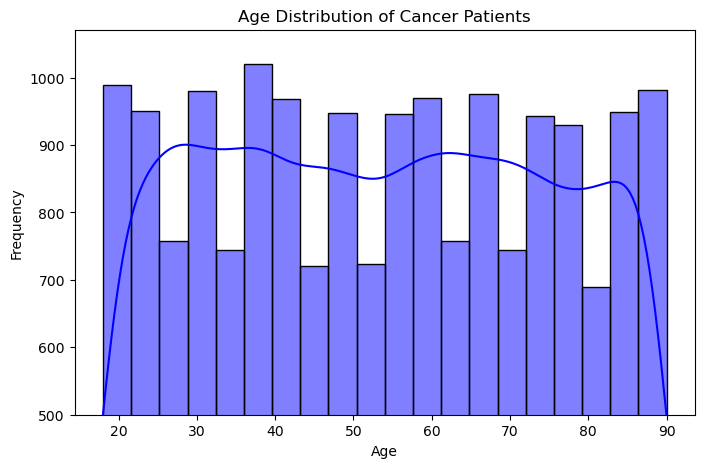

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')

# Set Y-axis to start from 500
plt.ylim(500) 

plt.title("Age Distribution of Cancer Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


C:\Users\SHIVA\AppData\Local\Temp\ipykernel_21572\2768454764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["CancerType"], order=df["CancerType"].value_counts().index, palette="viridis")


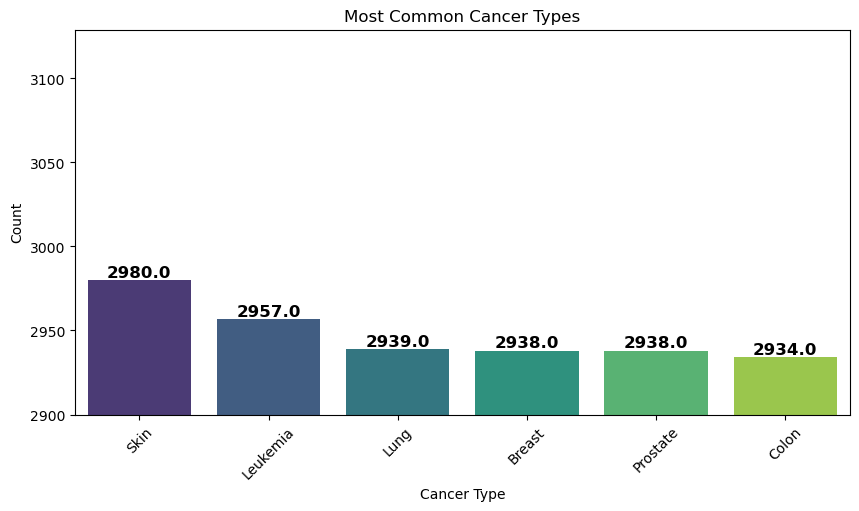

In [8]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df["CancerType"], order=df["CancerType"].value_counts().index, palette="viridis")

# Add labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set Y-axis to start from 2900
plt.ylim(2900) 

plt.title("Most Common Cancer Types")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


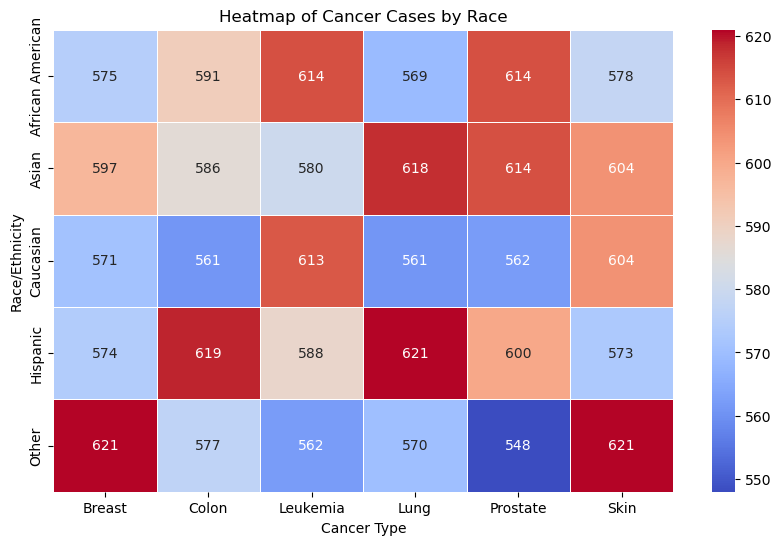

In [9]:
heatmap_data = df.groupby(["Race/Ethnicity", "CancerType"]).size().reset_index(name="Count")
pivot_table = heatmap_data.pivot(index="Race/Ethnicity", columns="CancerType", values="Count")

# Fill missing values with 0 (if any)
pivot_table = pivot_table.fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

# Titles and Labels
plt.title("Heatmap of Cancer Cases by Race")
plt.xlabel("Cancer Type")
plt.ylabel("Race/Ethnicity")

plt.show()

In [10]:
# Define bins and labels
bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
labels = ["Underwight", "Normal", "Overweight", "Obese", "Extremly Obese"]

# Create a new column for BMI groups
df["BMI_Group"] = pd.cut(df["BMI"], bins=bins, labels=labels, include_lowest=True)

# Display sample data
df[["BMI", "BMI_Group"]].head(10)


,BMI,BMI_Group
0,23.3,Normal
1,22.4,Normal
2,21.5,Normal
3,30.4,Obese
4,20.9,Normal
5,33.8,Obese
6,26.3,Overweight
7,25.9,Overweight
8,30.5,Obese
9,26.7,Overweight


C:\Users\SHIVA\AppData\Local\Temp\ipykernel_21572\3851390721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["BMI_Group"], palette="coolwarm", order=labels)


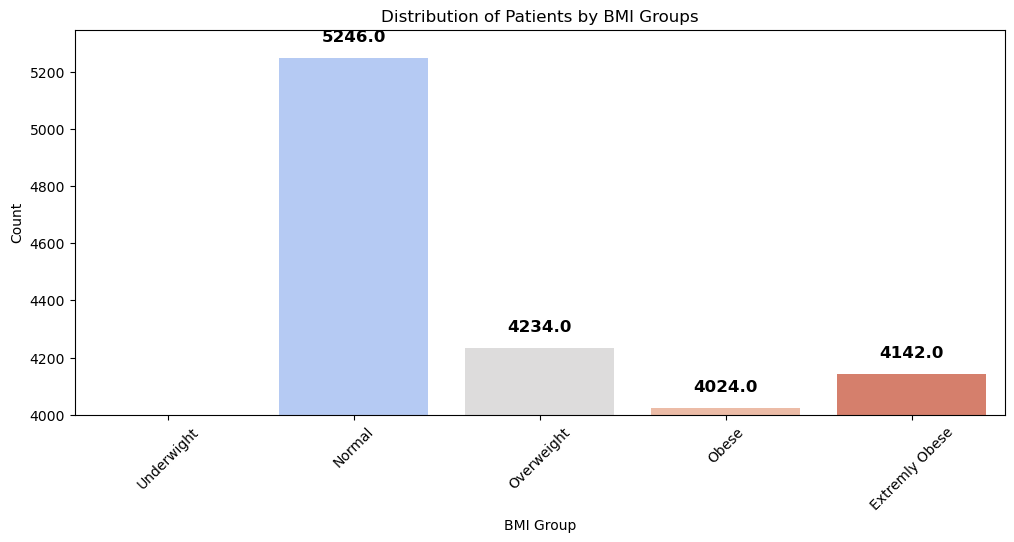

In [12]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x=df["BMI_Group"], palette="coolwarm", order=labels)

# Adjust labels inside bars for better readability
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 100),  # Shift label inside the bar
                ha='center', va='top', fontsize=12, fontweight='bold')  # White text inside bar

# Set Y-axis to start from 600
plt.ylim(4000, df["BMI_Group"].value_counts().max() + 100) 

# Titles and Labels
plt.title("Distribution of Patients by BMI Groups")
plt.xlabel("BMI Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Group data by Stage and BMI_Group
bmi_stage_counts = df.groupby(["Stage", "BMI_Group"]).size().reset_index(name="Count")

# Display first few rows
bmi_stage_counts.head()

C:\Users\SHIVA\AppData\Local\Temp\ipykernel_21572\343968595.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_stage_counts = df.groupby(["Stage", "BMI_Group"]).size().reset_index(name="Count")


,Stage,BMI_Group,Count
0,I,Underwight,10
1,I,Normal,1356
2,I,Overweight,1023
3,I,Obese,1020
4,I,Extremly Obese,1062


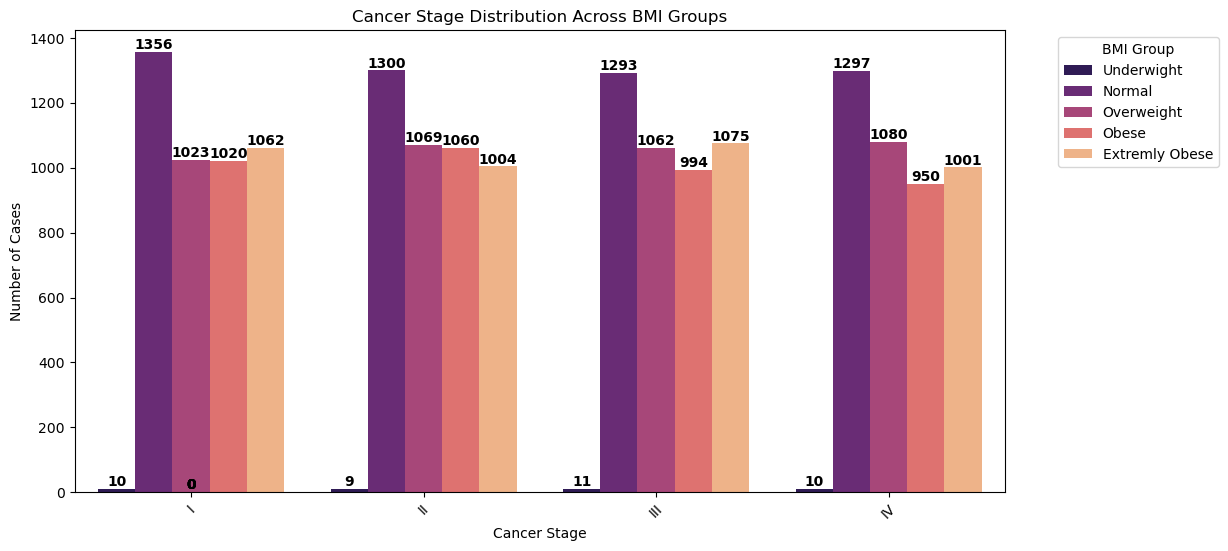

In [14]:
plt.figure(figsize=(12, 6))

# Create a grouped bar plot
ax = sns.barplot(data=bmi_stage_counts, x="Stage", y="Count", hue="BMI_Group", palette="magma")

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and Labels
plt.title("Cancer Stage Distribution Across BMI Groups")
plt.xlabel("Cancer Stage")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend(title="BMI Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
df_sorted = df.sort_values(by="SurvivalMonths", ascending=False)

# Display the first few rows
df_sorted.head()

,PatientID,Age,Gender,Race/Ethnicity,BMI,SmokingStatus,FamilyHistory,CancerType,Stage,TumorSize,TreatmentType,TreatmentResponse,SurvivalMonths,Recurrence,GeneticMarker,HospitalRegion,BMI_Group
400,401,60,Female,Hispanic,32.2,Former Smoker,Yes,Colon,I,3.0,Chemotherapy,No Response,120,No,Unknown,South,Obese
2175,2176,34,Male,Other,29.5,Former Smoker,Yes,Breast,II,4.0,Chemotherapy,No Response,120,Yes,BRCA1,East,Overweight
7636,7637,35,Male,Asian,32.6,Former Smoker,No,Skin,II,9.6,Chemotherapy,Partial Remission,120,Yes,EGFR,North,Obese
6423,6424,55,Male,African American,28.5,Former Smoker,No,Prostate,II,6.9,Combination Therapy,Partial Remission,120,Yes,Unknown,North,Overweight
6441,6442,65,Female,African American,32.3,Smoker,Yes,Prostate,IV,6.9,Chemotherapy,Complete Remission,120,No,Unknown,South,Obese


In [16]:
# Define bins and labels
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ["Very Short", "Short", "Medium", "Long", "Very Long", "Extremely Long"]

# Create a new column for survival groups
df["SurvivalGroup"] = pd.cut(df["SurvivalMonths"], bins=bins, labels=labels, include_lowest=True)

# Display sample data
df[["SurvivalMonths", "SurvivalGroup"]].head(10)


,SurvivalMonths,SurvivalGroup
0,103,Extremely Long
1,14,Very Short
2,61,Long
3,64,Long
4,82,Very Long
5,95,Very Long
6,88,Very Long
7,95,Very Long
8,117,Extremely Long
9,43,Medium


C:\Users\SHIVA\AppData\Local\Temp\ipykernel_21572\1729448300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["SurvivalGroup"], palette="coolwarm", order=labels)


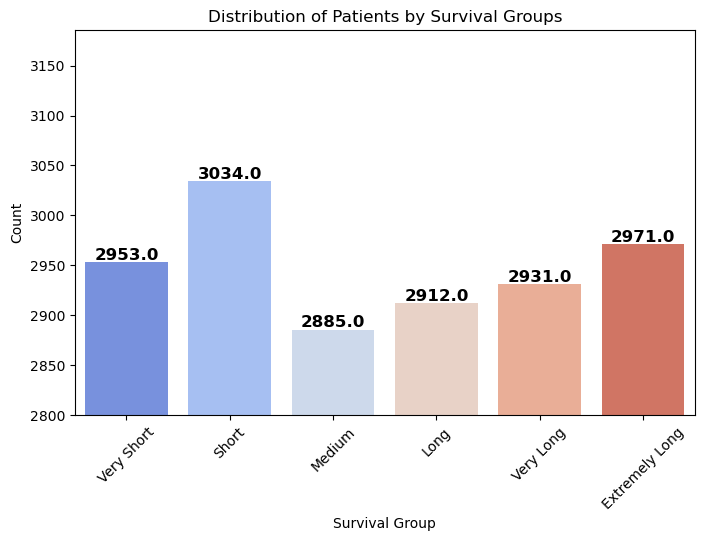

In [17]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df["SurvivalGroup"], palette="coolwarm", order=labels)
# Add labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set Y-axis to start from 2800
plt.ylim(2800) 

plt.title("Distribution of Patients by Survival Groups")
plt.xlabel("Survival Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Group data by SurvivalGroup, TreatmentType, and CancerType
survival_treatment_cancer = df.groupby(["SurvivalGroup", "TreatmentType", "CancerType"]).size().reset_index(name="Count")

# Display the first few rows
survival_treatment_cancer.head()

C:\Users\SHIVA\AppData\Local\Temp\ipykernel_21572\3452768868.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_treatment_cancer = df.groupby(["SurvivalGroup", "TreatmentType", "CancerType"]).size().reset_index(name="Count")


,SurvivalGroup,TreatmentType,CancerType,Count
0,Very Short,Chemotherapy,Breast,119
1,Very Short,Chemotherapy,Colon,129
2,Very Short,Chemotherapy,Leukemia,117
3,Very Short,Chemotherapy,Lung,138
4,Very Short,Chemotherapy,Prostate,133


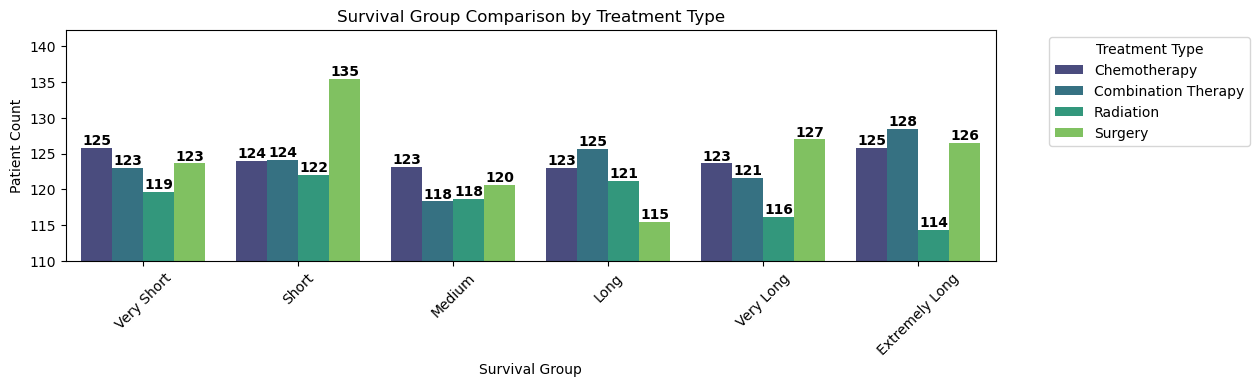

In [19]:
plt.figure(figsize=(12, 3))

# Create a grouped bar plot
ax = sns.barplot(data=survival_treatment_cancer, x="SurvivalGroup", y="Count", hue="TreatmentType", palette="viridis",
                 errorbar=None)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
# Set Y-axis to start from 110
plt.ylim(110) 

# Titles and Labels
plt.title("Survival Group Comparison by Treatment Type")
plt.xlabel("Survival Group")
plt.ylabel("Patient Count")
plt.xticks(rotation=45)
plt.legend(title="Treatment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
# Add a new column 'Effectiveness' based on 'Recurrence'
df["Effectiveness"] = df["Recurrence"].apply(lambda x: 1 if x == "No" else 0)
df.head()

,PatientID,Age,Gender,Race/Ethnicity,BMI,SmokingStatus,FamilyHistory,CancerType,Stage,TumorSize,TreatmentType,TreatmentResponse,SurvivalMonths,Recurrence,GeneticMarker,HospitalRegion,BMI_Group,SurvivalGroup,Effectiveness
0,1,80,Female,Other,23.3,Smoker,Yes,Breast,II,1.7,Combination Therapy,No Response,103,Yes,Unknown,South,Normal,Extremely Long,0
1,2,76,Male,Caucasian,22.4,Former Smoker,Yes,Colon,IV,4.7,Surgery,No Response,14,Yes,BRCA1,West,Normal,Very Short,0
2,3,69,Male,Asian,21.5,Smoker,Yes,Breast,III,8.3,Combination Therapy,Complete Remission,61,Yes,BRCA1,West,Normal,Long,0
3,4,77,Male,Asian,30.4,Former Smoker,Yes,Prostate,II,1.7,Radiation,Partial Remission,64,No,KRAS,South,Obese,Long,1
4,5,89,Male,Caucasian,20.9,Smoker,Yes,Lung,IV,7.4,Radiation,No Response,82,Yes,KRAS,South,Normal,Very Long,0


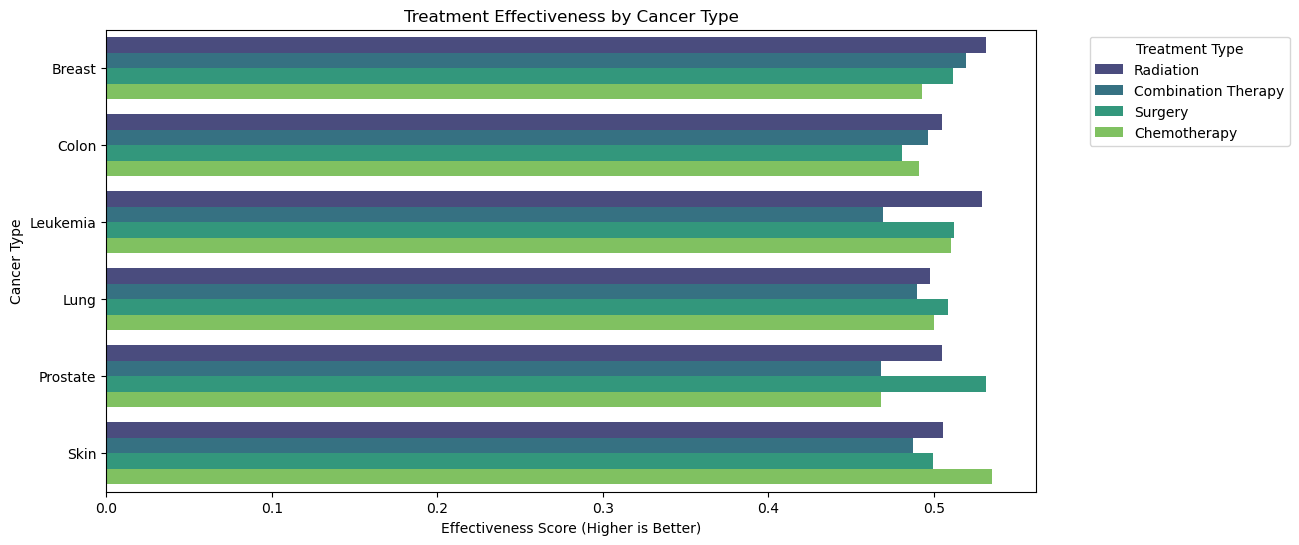

In [21]:
treatment_effectiveness = df.groupby(["TreatmentType", "CancerType"])["Effectiveness"].mean().reset_index()

# Sort the results for better readability
treatment_effectiveness = treatment_effectiveness.sort_values(by=["CancerType", "Effectiveness"], ascending=[True, False])

# Display the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Effectiveness", y="CancerType", hue="TreatmentType", data=treatment_effectiveness, palette="viridis")

plt.title("Treatment Effectiveness by Cancer Type")
plt.xlabel("Effectiveness Score (Higher is Better)")
plt.ylabel("Cancer Type")
plt.legend(title="Treatment Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

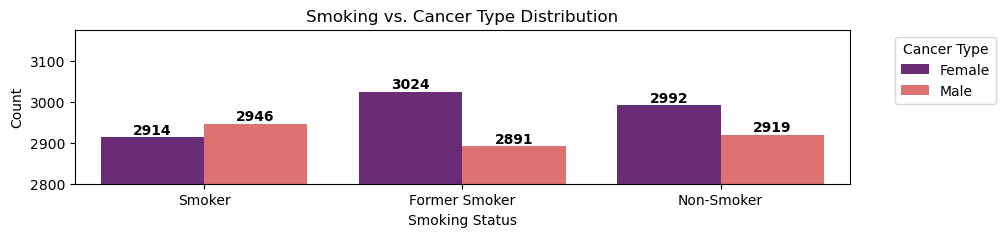

In [22]:
plt.figure(figsize=(10, 2))
ax = sns.countplot(x=df["SmokingStatus"], hue=df["Gender"], palette="magma")
# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
# Set Y-axis to start from 2800
plt.ylim(2800) 

plt.title("Smoking vs. Cancer Type Distribution")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title="Cancer Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

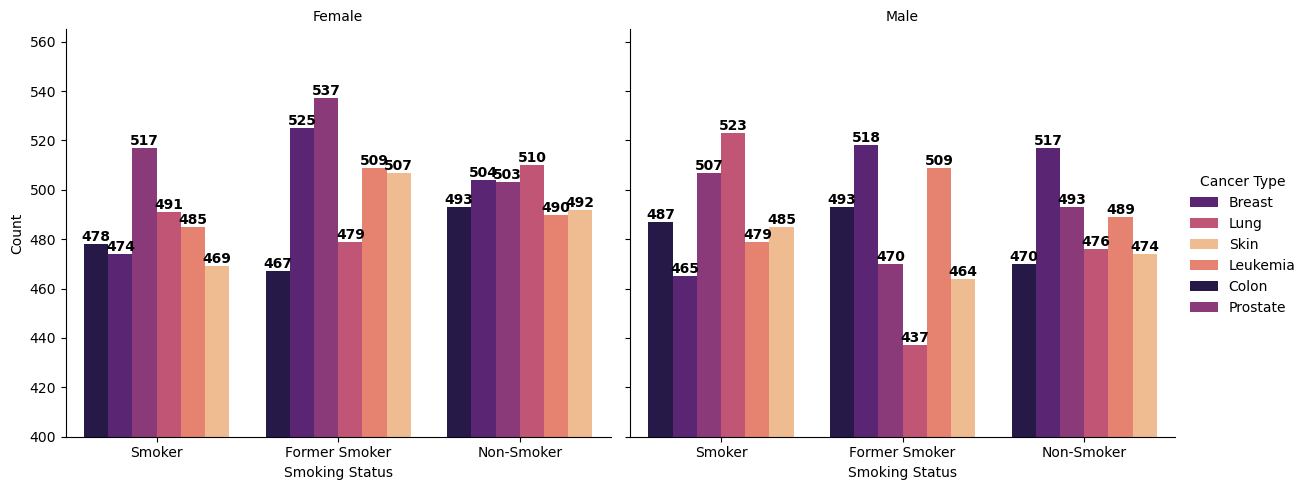

In [23]:

# Create a FacetGrid to separate by Gender
g = sns.FacetGrid(df, col="Gender", height=5, aspect=1.2, sharey=True)

# Map the countplot inside the grid
g.map_dataframe(sns.countplot, x="SmokingStatus", hue="CancerType", palette="magma")

# Add labels on each bar
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set Y-axis to start from 900
g.set(ylim=(400, df["SmokingStatus"].value_counts().max() - 5350))

# Set titles and labels
g.set_axis_labels("Smoking Status", "Count")
g.set_titles(col_template="{col_name}")

# Adjust legend
g.add_legend(title="Cancer Type")

# Show the plot
plt.show()

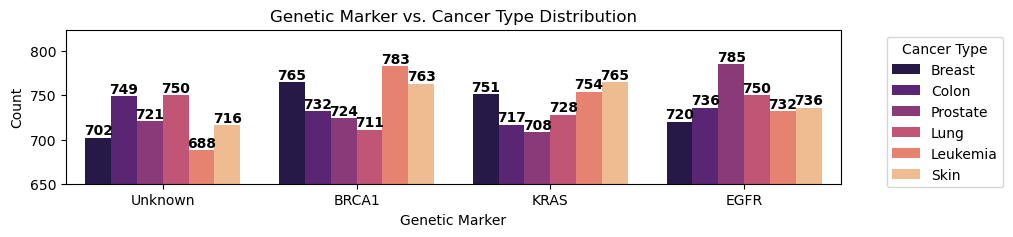

In [24]:
plt.figure(figsize=(10, 2))
ax = sns.countplot(x=df["GeneticMarker"], hue=df["CancerType"], palette="magma")
# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')
# Set Y-axis to start from 650
plt.ylim(650) 

plt.title("Genetic Marker vs. Cancer Type Distribution")
plt.xlabel("Genetic Marker")
plt.ylabel("Count")
plt.legend(title="Cancer Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [25]:
# Define Age bins and labels
age_bins = [0, 18, 30, 45, 60, 75, 120]  # Covering all ages
age_labels = ["Child", "Young Adult", "Adult", "Middle Aged", "Senior", "Elderly"]

# Create a new column for Age Groups
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, include_lowest=True)

# Display the first few rows
df[["Age", "AgeGroup"]].head(10)

,Age,AgeGroup
0,80,Elderly
1,76,Elderly
2,69,Senior
3,77,Elderly
4,89,Elderly
5,64,Senior
6,60,Middle Aged
7,54,Middle Aged
8,52,Middle Aged
9,86,Elderly


C:\Users\SHIVA\AppData\Local\Temp\ipykernel_21572\1622366845.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(["AgeGroup", "SurvivalGroup"]).size().reset_index(name="Count")


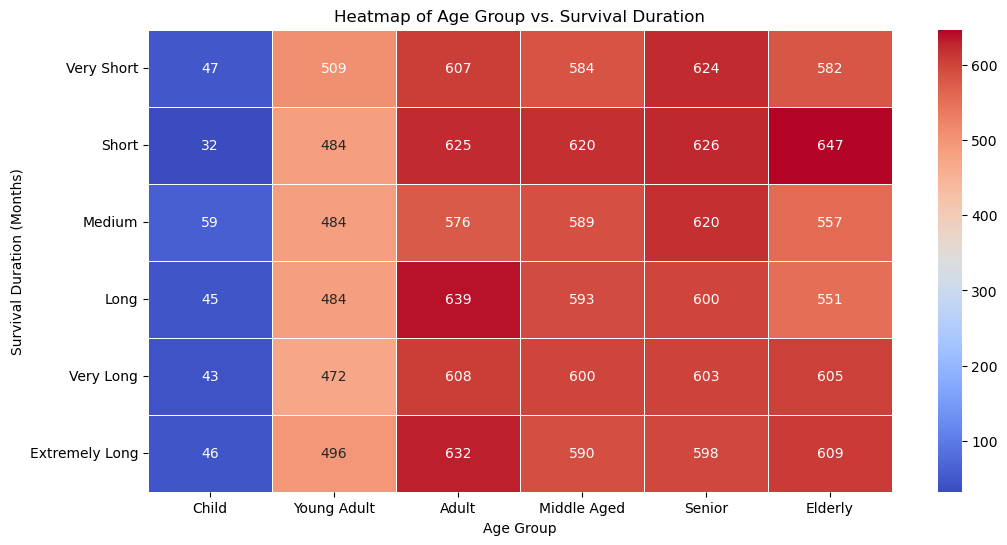

In [26]:
heatmap_data = df.groupby(["AgeGroup", "SurvivalGroup"]).size().reset_index(name="Count")

# Pivot table for heatmap
pivot_table = heatmap_data.pivot(index="SurvivalGroup", columns="AgeGroup", values="Count")

# Fill missing values with 0
pivot_table = pivot_table.fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")

# Titles and Labels
plt.title("Heatmap of Age Group vs. Survival Duration")
plt.xlabel("Age Group")
plt.ylabel("Survival Duration (Months)")

plt.show()

In [27]:
df_encoded = df.copy()
le = LabelEncoder()
df_encoded["Race/Ethnicity"] = le.fit_transform(df["Race/Ethnicity"])
df_encoded["CancerType"] = le.fit_transform(df["CancerType"])

# Define features and target
X = df_encoded[["Race/Ethnicity"]]
y = df_encoded["CancerType"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.16


In [28]:
df_encoded = df.copy()

# Encode categorical variables
le_cancer = LabelEncoder()
le_smoking = LabelEncoder()

# Encode CancerType
df_encoded["CancerType"] = le_cancer.fit_transform(df_encoded["CancerType"])

# Encode SmokingStatus (to fix the error)
df_encoded["SmokingStatus"] = le_smoking.fit_transform(df_encoded["SmokingStatus"])

# Print encoded labels for reference
print("Encoded Cancer Types:", dict(zip(le_cancer.classes_, le_cancer.transform(le_cancer.classes_))))
print("Encoded Smoking Status:", dict(zip(le_smoking.classes_, le_smoking.transform(le_smoking.classes_))))
if "Lung" in le_cancer.classes_:
    lung_encoded_value = le_cancer.transform(["Lung"])[0]  # Get the encoded value for "Lung"
else:
    raise ValueError("Lung cancer type is missing from the dataset!")

# Define features (X) and target (y)
X = df_encoded[["SmokingStatus"]]
y = (df_encoded["CancerType"] == lung_encoded_value).astype(int)  # Convert to binary classification

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Encoded Cancer Types: {'Breast': np.int64(0), 'Colon': np.int64(1), 'Leukemia': np.int64(2), 'Lung': np.int64(3), 'Prostate': np.int64(4), 'Skin': np.int64(5)}
Encoded Smoking Status: {'Former Smoker': np.int64(0), 'Non-Smoker': np.int64(1), 'Smoker': np.int64(2)}
Accuracy: 0.83


In [29]:
df_encoded["Stage"] = le.fit_transform(df["Stage"])
df_encoded["BMI_Group"] = le.fit_transform(df["BMI_Group"])

# Compute correlation
correlation = df_encoded[["BMI_Group", "Stage"]].corr()
print(correlation)

           BMI_Group    Stage
BMI_Group    1.00000  0.00839
Stage        0.00839  1.00000


In [30]:
df_encoded = df.copy()
le = LabelEncoder()
df_encoded["Stage"] = le.fit_transform(df["Stage"])
df_encoded["BMI_Group"] = le.fit_transform(df["BMI_Group"])

# Define features (X) and target (y)
X = df_encoded[["BMI_Group"]]
y = df_encoded["Stage"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.25


In [31]:
# Copy dataset
df_encoded = df.copy()

# Initialize label encoders
le_treatment = LabelEncoder()
le_cancer = LabelEncoder()
le_marker = LabelEncoder()
le_stage = LabelEncoder()
le_recurrence = LabelEncoder()

# Fit encoders on full columns
df_encoded["TreatmentType"] = le_treatment.fit_transform(df_encoded["TreatmentType"])
df_encoded["CancerType"] = le_cancer.fit_transform(df_encoded["CancerType"])
df_encoded["GeneticMarker"] = le_marker.fit_transform(df_encoded["GeneticMarker"])
df_encoded["Stage"] = le_stage.fit_transform(df_encoded["Stage"])
df_encoded["Recurrence"] = le_recurrence.fit_transform(df_encoded["Recurrence"])
if "Combination Therapy" in le_treatment.classes_:
    combo_encoded = le_treatment.transform(["Combination Therapy"])[0]
else:
    raise ValueError("Combination Therapy is missing from the dataset!")

# Define features (X) and target (y) for Combination Therapy
X = df_encoded[["CancerType", "Age", "GeneticMarker", "Stage", "Recurrence"]]
y = (df_encoded["TreatmentType"] == combo_encoded).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Combination Therapy Effectiveness Prediction Accuracy: {accuracy:.2f}")

Combination Therapy Effectiveness Prediction Accuracy: 0.67


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Copy dataset
df_encoded = df.copy()

# Initialize label encoders
le_treatment = LabelEncoder()
le_cancer = LabelEncoder()
le_marker = LabelEncoder()
le_stage = LabelEncoder()
le_recurrence = LabelEncoder()
df_encoded["TreatmentType"] = le_treatment.fit_transform(df_encoded["TreatmentType"])
df_encoded["CancerType"] = le_cancer.fit_transform(df_encoded["CancerType"])
df_encoded["GeneticMarker"] = le_marker.fit_transform(df_encoded["GeneticMarker"])
df_encoded["Stage"] = le_stage.fit_transform(df_encoded["Stage"])
df_encoded["Recurrence"] = le_recurrence.fit_transform(df_encoded["Recurrence"])

# Check if "Chemotherapy" is in the encoded classes
if "Chemotherapy" in le_treatment.classes_:
    chemo_encoded = le_treatment.transform(["Chemotherapy"])[0]
else:
    raise ValueError("Chemotherapy is missing from the dataset!")

# Check if "Leukemia" and "Breast" are in the encoded classes
if "Leukemia" in le_cancer.classes_ and "Breast" in le_cancer.classes_:
    leukemia_encoded = le_cancer.transform(["Leukemia"])[0]
    breast_encoded = le_cancer.transform(["Breast"])[0]
else:
    raise ValueError("Leukemia or Breast Cancer is missing from the dataset!")
X = df_encoded[["CancerType", "Age", "GeneticMarker", "Stage", "Recurrence"]]
y = ((df_encoded["TreatmentType"] == chemo_encoded) & 
     ((df_encoded["CancerType"] == leukemia_encoded) | 
      (df_encoded["CancerType"] == breast_encoded))).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Chemotherapy Effectiveness Prediction Accuracy for Leukemia & Breast Cancer: {accuracy:.2f}")

Chemotherapy Effectiveness Prediction Accuracy for Leukemia & Breast Cancer: 0.87


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Copy dataset
df_encoded = df.copy()

# Initialize label encoders
le_treatment = LabelEncoder()
le_cancer = LabelEncoder()
le_marker = LabelEncoder()
le_stage = LabelEncoder()
le_recurrence = LabelEncoder()
rrence = LabelEncoder()

# Fit encoders on full columns
df_encoded["TreatmentType"] = le_treatment.fit_transform(df_encoded["TreatmentType"])
df_encoded["CancerType"] = le_cancer.fit_transform(df_encoded["CancerType"])
df_encoded["GeneticMarker"] = le_marker.fit_transform(df_encoded["GeneticMarker"])
df_encoded["Stage"] = le_stage.fit_transform(df_encoded["Stage"])
df_encoded["Recurrence"] = le_recurrence.fit_transform(df_encoded["Recurrence"])

# Check if "Radiation" is in the encoded classes
if "Radiation" in le_treatment.classes_:
    radiation_encoded = le_treatment.transform(["Radiation"])[0]
else:
    raise ValueError("Radiation is missing from the dataset!")

# Check if "Lung" and "Prostate" are in the encoded classes
if "Lung" in le_cancer.classes_ and "Prostate" in le_cancer.classes_:
    lung_encoded = le_cancer.transform(["Lung"])[0]
    prostate_encoded = le_cancer.transform(["Prostate"])[0]
else:
    raise ValueError("Lung or Prostate Cancer is missing from the dataset!")
    X = df_encoded[["CancerType", "Age", "GeneticMarker", "Stage", "Recurrence"]]
y = ((df_encoded["TreatmentType"] == radiation_encoded) & 
     ((df_encoded["CancerType"] == lung_encoded) | 
      (df_encoded["CancerType"] == prostate_encoded))).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Radiation Effectiveness Prediction Accuracy for Lung & Prostate Cancer: {accuracy:.2f}")

Radiation Effectiveness Prediction Accuracy for Lung & Prostate Cancer: 0.89


In [34]:
df_encoded = df.copy()

# Initialize label encoders
le_cancer = LabelEncoder()
le_treatment = LabelEncoder()
le_smoking = LabelEncoder()
le_genetic = LabelEncoder()
le_family = LabelEncoder()
le_survival = LabelEncoder()

# Encode categorical variables
df_encoded["CancerType"] = le_cancer.fit_transform(df_encoded["CancerType"])
df_encoded["TreatmentType"] = le_treatment.fit_transform(df_encoded["TreatmentType"])
df_encoded["SmokingStatus"] = le_smoking.fit_transform(df_encoded["SmokingStatus"])
df_encoded["GeneticMarker"] = le_genetic.fit_transform(df_encoded["GeneticMarker"])
df_encoded["FamilyHistory"] = le_family.fit_transform(df_encoded["FamilyHistory"])
# Define survival groups (Low Risk = 0, High Risk = 1)
df_encoded["SurvivalGroup"] = (df_encoded["SurvivalMonths"] > df_encoded["SurvivalMonths"].median()).astype(int)

# Define features (X) and target (y)
X = df_encoded[["Age", "CancerType", "TreatmentType", "SmokingStatus", "BMI", "GeneticMarker", "FamilyHistory"]]
y = df_encoded["SurvivalGroup"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Updated Survival Prediction Model Accuracy : {accuracy:.2f}")

Updated Survival Prediction Model Accuracy : 0.50
